# Building a phonetic dataset from textgrids and measurements

In [1]:
from parselmouth import Sound
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import phonlab as phon
import importlib
#from phonlab import get_f0
#from phonlab import tg_to_df, add_context, merge_tiers, explode_intervals, interpolate_measures, loadsig

## Examples

In [2]:
example_wav = importlib.resources.files('phonlab') / 'data/example_audio/im_twelve.wav'
example_tg = importlib.resources.files('phonlab') / 'data/example_audio/im_twelve.TextGrid'

au, rate = phon.loadsig(example_wav)
formant = Sound(au, rate).to_formant_burg()

In [6]:
phdf, wddf = phon.tg_to_df(example_tg, tiersel=['phone', 'word'])
phdf = phon.add_context(phdf, 'phone', nprev=2, nnext=2, ctxcol='phonectx')
wddf = phon.add_context(wddf, 'word', nprev=1, nnext=0, ctxcol='wdctx')
phwddf = phon.merge_tiers(inner_df=phdf, outer_df=wddf, suffixes=['_ph', ''], outer_ts=['t1', 't2'], drop_repeated_cols='inner_df')
vowels = ['ay', 'eh', 'ah', 'aa', 'aw']
vdf = phwddf.query(f'phone in {vowels}')
vdf

,t1_ph,t2_ph,prev_phone2,prev_phone1,phone,next_phone1,next_phone2,phonectx,t1,t2,prev_word1,word,wdctx
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,sp,I'm,sp I'm
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,I'm,twelve,I'm twelve
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,you,talking,you talking
17,1.690976,1.739653,k,en,ah,b,aw,en k ah aw b,1.690976,1.976042,talking,about,talking about
19,1.799457,1.976042,ah,b,aw,,,b ah aw,1.690976,1.976042,talking,about,talking about


In [7]:
vdf = phon.explode_intervals(2, ts=['t1_ph', 't2_ph'], df=vdf)
vdf

,t1_ph,t2_ph,prev_phone2,prev_phone1,phone,next_phone1,next_phone2,phonectx,t1,t2,prev_word1,word,wdctx,obs_t,obs_id
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,sp,I'm,sp I'm,0.035047,0
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,sp,I'm,sp I'm,0.080794,1
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,sp,I'm,sp I'm,0.126541,2
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,I'm,twelve,I'm twelve,0.39894,0
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,I'm,twelve,I'm twelve,0.48656,1
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,I'm,twelve,I'm twelve,0.574179,2
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,you,talking,you talking,1.405795,0
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,you,talking,you talking,1.498953,1
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,you,talking,you talking,1.592111,2
17,1.690976,1.739653,k,en,ah,b,aw,en k ah aw b,1.690976,1.976042,talking,about,talking about,1.690976,0


## Generic df interface

Establish a pattern for easily getting values from **any** time-based dataframe of measurements.

First, create a dataframe of this type as a proof of concept. The `tcol` column has time values, and `genf1` and `genf2` are values for F1 and F2. The `foo` column is added as a nonce column of a non-numeric type.

In [8]:
gendf = pd.read_csv('generic_formant.csv')
gendf

,tcol,f1,f2,foo
0,0.027187,993.279286,1492.845320,nonce
1,0.033437,1034.390408,1469.361084,nonce
2,0.039687,1040.824979,1444.246084,nonce
3,0.045937,1051.933204,1439.744705,nonce
4,0.052187,1057.320050,1436.092433,nonce
...,...,...,...,...
307,1.945938,729.259123,1142.790641,nonce
308,1.952187,694.972178,1064.015901,nonce
309,1.958438,682.759568,1070.449201,nonce
310,1.964687,653.720818,1048.153592,nonce


In [9]:
f0df = phon.get_f0_acd(au, fs=rate)
f0df

,sec,f0,rms,h1h2,c,probv,voiced
0,0.020,342.578125,-46.706184,-3.709549,2.333333,0.318721,False
1,0.025,333.593750,-41.521969,-5.436157,2.000000,0.585765,True
2,0.030,NaN,-36.874432,NaN,5.000000,0.197830,False
3,0.035,NaN,-33.954758,NaN,5.000000,0.282365,False
4,0.040,NaN,-32.423321,NaN,5.000000,0.334538,False
...,...,...,...,...,...,...,...
387,1.955,98.007812,-33.836369,-11.536026,2.500000,0.761547,True
388,1.960,97.734375,-34.176224,-10.992931,2.200000,0.795077,True
389,1.965,97.671875,-34.496334,-12.274567,2.250000,0.779557,True
390,1.970,97.505208,-34.876160,-11.232224,2.200000,0.776227,True


The `vdf` dataframe has metadata for vowels and was already used to get `f1` and `f2` values by using a praat-specific function (`praatformant_to_df`) on a parselmouth Formant object.

The `interpolate_measures` function takes a measurement df `measdf` that contains a time column specified by the `meas_ts` parameter. Notice that we take a subset of `gendf` when setting the `measdf` parameter, as non-numeric columns cannot be interpolated and raise an error.

The `interpdf` parameter is used to specify the dataframe that has times for which measures from `measdf` are interpolated. The name of the column containing the times to be interpolated is specified by the `interp_ts` parameter value.

In [10]:
vdf = phon.interpolate_measures(
    meas_df=gendf[['tcol', 'f1', 'f2']],  # tcol + cols to interpolate only
    meas_ts='tcol',
    interp_df=vdf,
    interp_ts='obs_t',
    tol = 0.01
)
vdf

,t1_ph,t2_ph,prev_phone2,prev_phone1,phone,next_phone1,next_phone2,phonectx,t1,t2,prev_word1,word,wdctx,obs_t,obs_id,f1,f2
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,sp,I'm,sp I'm,0.035047,0,1036.047746,1462.892267
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,sp,I'm,sp I'm,0.080794,1,974.054775,1555.368160
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,sp,I'm,sp I'm,0.126541,2,1011.239355,1920.877879
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,I'm,twelve,I'm twelve,0.39894,0,693.353609,1217.665230
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,I'm,twelve,I'm twelve,0.48656,1,800.023214,1386.503879
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,I'm,twelve,I'm twelve,0.574179,2,723.383617,1228.222929
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,you,talking,you talking,1.405795,0,554.127949,1158.992987
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,you,talking,you talking,1.498953,1,1017.272205,1314.589402
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,you,talking,you talking,1.592111,2,1022.525184,1452.605946
17,1.690976,1.739653,k,en,ah,b,aw,en k ah aw b,1.690976,1.976042,talking,about,talking about,1.690976,0,859.613744,1988.178121


In [11]:
f0df = phon.get_f0_acd(au, fs=rate)
vdf = phon.interpolate_measures(
    meas_df=f0df.drop(columns='voiced'),  # tcol + cols to interpolate only
    meas_ts='sec',
    interp_df=vdf,
    interp_ts='obs_t', tol=0.1
)
vdf

,t1_ph,t2_ph,prev_phone2,prev_phone1,phone,next_phone1,next_phone2,phonectx,t1,t2,...,wdctx,obs_t,obs_id,f1,f2,f0,rms,h1h2,c,probv
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,sp I'm,0.035047,0,1036.047746,1462.892267,NaN,-33.940271,NaN,5.000000,0.282858
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,sp I'm,0.080794,1,974.054775,1555.368160,256.027280,-31.744283,-0.751098,1.960282,0.874707
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,sp I'm,0.126541,2,1011.239355,1920.877879,279.646400,-32.193048,0.315865,2.000000,0.862831
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,I'm twelve,0.39894,0,693.353609,1217.665230,250.334249,-26.730493,-14.657818,1.750000,0.948843
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,I'm twelve,0.48656,1,800.023214,1386.503879,165.651904,-28.290498,-35.104982,2.000000,0.921528
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,I'm twelve,0.574179,2,723.383617,1228.222929,327.921111,-27.754654,-11.002083,1.666667,0.944034
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,you talking,1.405795,0,554.127949,1158.992987,288.982579,-40.295526,14.234180,1.719693,0.684256
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,you talking,1.498953,1,1017.272205,1314.589402,317.686681,-38.362537,11.798482,1.736464,0.744682
14,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,you talking,1.592111,2,1022.525184,1452.605946,348.602397,-50.690016,0.465748,2.288932,0.204681
17,1.690976,1.739653,k,en,ah,b,aw,en k ah aw b,1.690976,1.976042,...,talking about,1.690976,0,859.613744,1988.178121,300.809243,-39.101085,8.783350,1.934926,0.686190


## Applying custom functions to individual tokens

Now that we have a dataset of acoustic measures for our vowel tokens, we use the [split-apply-combine pattern](https://pandas.pydata.org/docs/user_guide/groupby.html) to apply custom functions to (1) characterize pitch dynamics; (2) plot the tokens.

First, create a token grouper that identifies the individual tokens. In our simple dataset the `t1_ph` column is sufficient. A more complicated dataset would `groupby` multiple columns. The grouper maps `t1_ph` times to the dataframe index, where multiple rows share the same index (in fact, we could also have done `groupby(level=0)` to make an equivalent grouping using the dataframe index instead of the `t1_ph` column). We also restrict the grouper to columns that will be of interest.

In [12]:
tokens = vdf.groupby(['t1_ph'])[['f0', 'f1', 'f2', 't1_ph', 't2_ph', 'obs_t', 'obs_id']]
tokens.groups # maps `t1_ph` times to indexes

{0.03504729926105083: [1, 1, 1], 0.3989404423616672: [5, 5, 5], 1.4057954017785557: [14, 14, 14], 1.6909761122249611: [17, 17, 17], 1.799457040372794: [19, 19, 19]}

### Developing a function

We extract one of these groupings in order to conveniently develop a custom function that operates on a single group at a time. Here we take the group at index `5`, which has `t1_ph` time 0.470892. Our goal is to characterize whether F0 rises or falls over the first and second halves of the token.

A subset of the columns from the token is shown.

In [13]:
x = vdf.loc[5]
x[['t1_ph', 't2_ph', 'f0', 'obs_t', 'obs_id']]

,t1_ph,t2_ph,f0,obs_t,obs_id
5,0.39894,0.574179,250.334249,0.39894,0
5,0.39894,0.574179,165.651904,0.48656,1
5,0.39894,0.574179,327.921111,0.574179,2


Now that we have the group `x` to experiment with, we can work out the steps to categorize tokens by changes in F0 values over time.

We start by calling `diff` on the `f0` column, calculates the change of each F0 value from the preceding value. Since there is no value preceding the first one, its `diff` is `NaN`.

In [14]:
x['f0'].diff()

5           NaN
5    -84.682345
5    162.269207
Name: f0, dtype: float64

Create a slice `[1:]` starting from the second value to skip the `NaN`.

In [15]:
x['f0'].diff()[1:]

5    -84.682345
5    162.269207
Name: f0, dtype: float64

The `np.where` function is used to label positive rising values as `r` and negative falling values as `f`.

In [16]:
np.where(x['f0'].diff()[1:] >= 0, 'r', 'f')

array(['f', 'r'], dtype='<U1')

Finally, we concatenate these labels with the `join` function to create one of four possible F0 contours: `rr`, `rf`, `ff`, `fr`.

In [17]:
''.join(np.where(x['f0'].diff()[1:] > 0, 'r', 'f'))

'fr'

### `apply` an unnamed lambda function

Since this calculation is simple it's a good candidate for a unnamed lambda function that we can `apply` to each group. The lambda function in combination with `apply` allows us to do the calculation on each group in succession, here named `x`. The result is a `Series` of contour types, indexed by `t1_ph`. `rename` is called on the result to give the `Series` the name `f0type`.

In [18]:
tokens.apply(
    lambda x: ''.join(np.where(x['f0'].diff()[1:] > 0, 'r', 'f'))
).rename('f0type')

t1_ph
0.035047    fr
0.398940    fr
1.405795    rr
1.690976    ff
1.799457    ff
Name: f0type, dtype: object

We can `merge` the result back into `vdf` based on the `t1_ph` values. The use of `rename` is important so that the new column has a name. The `merge` would fail without it.

In [19]:
vdf = vdf.merge(
    tokens.apply(
        lambda x: ''.join(np.where(x['f0'].diff()[1:] > 0, 'r', 'f'))
    ).rename('f0type'),
    on='t1_ph'
)
vdf

,t1_ph,t2_ph,prev_phone2,prev_phone1,phone,next_phone1,next_phone2,phonectx,t1,t2,...,obs_t,obs_id,f1,f2,f0,rms,h1h2,c,probv,f0type
0,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,0.035047,0,1036.047746,1462.892267,NaN,-33.940271,NaN,5.000000,0.282858,fr
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,0.080794,1,974.054775,1555.368160,256.027280,-31.744283,-0.751098,1.960282,0.874707,fr
2,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,0.126541,2,1011.239355,1920.877879,279.646400,-32.193048,0.315865,2.000000,0.862831,fr
3,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,0.39894,0,693.353609,1217.665230,250.334249,-26.730493,-14.657818,1.750000,0.948843,fr
4,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,0.48656,1,800.023214,1386.503879,165.651904,-28.290498,-35.104982,2.000000,0.921528,fr
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,0.574179,2,723.383617,1228.222929,327.921111,-27.754654,-11.002083,1.666667,0.944034,fr
6,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,1.405795,0,554.127949,1158.992987,288.982579,-40.295526,14.234180,1.719693,0.684256,rr
7,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,1.498953,1,1017.272205,1314.589402,317.686681,-38.362537,11.798482,1.736464,0.744682,rr
8,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,1.592111,2,1022.525184,1452.605946,348.602397,-50.690016,0.465748,2.288932,0.204681,rr
9,1.690976,1.739653,k,en,ah,b,aw,en k ah aw b,1.690976,1.976042,...,1.690976,0,859.613744,1988.178121,300.809243,-39.101085,8.783350,1.934926,0.686190,ff


### `apply` a named function

We'll illustrate the use of `apply` with named functions to do the same contour calculation on F1 and F2. We could easily use lambda functions for these as well, but it's good to know how to create named functions. Named functions are especially useful when you want to apply more complicated operations to your dataframe groups than can easily be included in a single line of code. **Always** include a docstring in your function that describes its purpose.

The first parameter of the new `risefalltype` function is a dataframe `df`, which will be supplied automatically by `apply`. The second parameter names the column in `df` to be summarized.

In [20]:
def risefalltype(df, col):
    '''
    Return a joined string of 'r' and 'f' for each interval in a dataframe
    (pairs of successive rows) where the values of `col` are rising
    ('r') or falling ('f'). The number of 'r' and 'f' characters in the
    result is one less than the number of rows.
    '''
    return ''.join(np.where(df[col].diff()[1:] > 0, 'r', 'f'))

Summarize F1 and F2 using the named function and `merge` with `vdf`. The first parameter to `apply` names the function to use (note that it is the function's symbol, like a variable name, not a string!). `apply` passes each dataframe group to the function as the first parameter. Named parameters like `col` are also passed to the function.

In [21]:
vdf = vdf.merge(
    tokens.apply(risefalltype, col='f1').rename('f1type'),
    on='t1_ph'
)
vdf = vdf.merge(
    tokens.apply(risefalltype, col='f2').rename('f2type'),
    on='t1_ph'
)
vdf

,t1_ph,t2_ph,prev_phone2,prev_phone1,phone,next_phone1,next_phone2,phonectx,t1,t2,...,f1,f2,f0,rms,h1h2,c,probv,f0type,f1type,f2type
0,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,1036.047746,1462.892267,NaN,-33.940271,NaN,5.000000,0.282858,fr,fr,rr
1,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,974.054775,1555.368160,256.027280,-31.744283,-0.751098,1.960282,0.874707,fr,fr,rr
2,0.035047,0.126541,,sp,ay,m,t,sp ay t m,0.035047,0.213045,...,1011.239355,1920.877879,279.646400,-32.193048,0.315865,2.000000,0.862831,fr,fr,rr
3,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,693.353609,1217.665230,250.334249,-26.730493,-14.657818,1.750000,0.948843,fr,rf,rf
4,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,800.023214,1386.503879,165.651904,-28.290498,-35.104982,2.000000,0.921528,fr,rf,rf
5,0.398940,0.574179,t,w,eh,l,v,w t eh v l,0.213045,0.825910,...,723.383617,1228.222929,327.921111,-27.754654,-11.002083,1.666667,0.944034,fr,rf,rf
6,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,554.127949,1158.992987,288.982579,-40.295526,14.234180,1.719693,0.684256,rr,rr,rr
7,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,1017.272205,1314.589402,317.686681,-38.362537,11.798482,1.736464,0.744682,rr,rr,rr
8,1.405795,1.592111,iy,t,aa,k,en,t iy aa en k,1.270775,1.690976,...,1022.525184,1452.605946,348.602397,-50.690016,0.465748,2.288932,0.204681,rr,rr,rr
9,1.690976,1.739653,k,en,ah,b,aw,en k ah aw b,1.690976,1.976042,...,859.613744,1988.178121,300.809243,-39.101085,8.783350,1.934926,0.686190,ff,ff,fr


## Plot by groups

F0, F1, and F2 plots showing all measures and interpolated values at 0%, 50%, 100%.

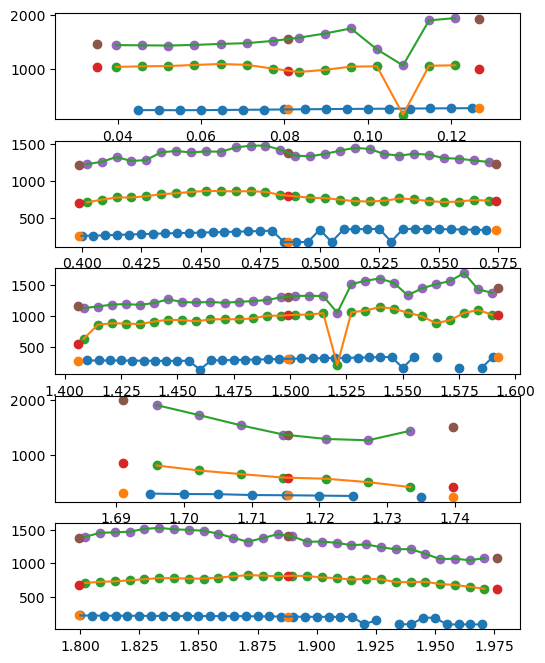

In [22]:
fig, axes = plt.subplots(5, 1, figsize=[6, 8])
for i, (t1, g) in enumerate(tokens):
    t1 = g['t1_ph'].iloc[0]
    t2 = g['t2_ph'].iloc[0]
    for col in ('f0', 'f1', 'f2'):
        if col == 'f0':
            mdf = f0df.query(f'(sec >= {t1}) and (sec <= {t2})')
            tcol = 'sec'
        else:
            mdf = gendf.query(f'(tcol >= {t1}) and (tcol <= {t2})')
            tcol = 'tcol'
        axes[i].plot(mdf[tcol], mdf[col])
        axes[i].scatter(mdf[tcol], mdf[col])
        axes[i].scatter(g['obs_t'], g[col])
        axes[i].set_xlim([t1-0.010, t2+0.010])